<a href="https://colab.research.google.com/github/carexoid/7-semester/blob/master/neural_networks/seminars/NN_Sem6_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-datasets

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Завантажимо датасет для бінарної класифікації "*коні_або_люди*"\.

In [ ]:
train_dir = 'drive/MyDrive/datasets/horse-or-human/train'
test_dir = 'drive/MyDrive/datasets/horse-or-human/validation'

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  image_size=(300, 300),
  batch_size=32)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(300, 300),
  batch_size=32)

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


Покажемо приклади зображень.

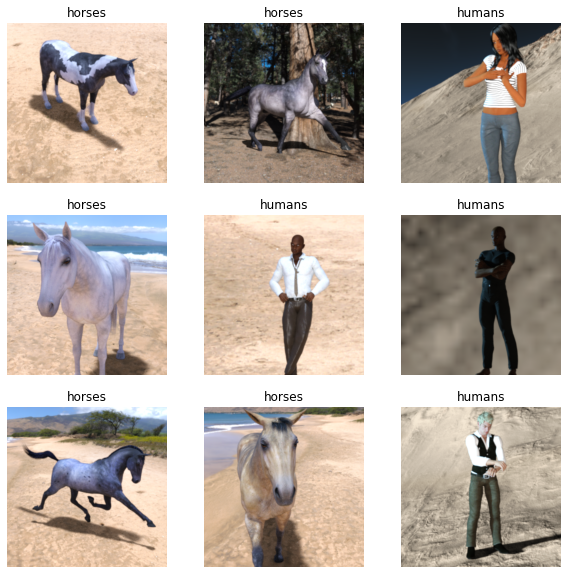

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

Перевіримо форму тензора зображень і тензора міток.

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 300, 300, 3)
(32,)


Побудуємо і натренуємо згорткову нейронну мережу.

In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(300, 300, 3)),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.MaxPool2D(4, 4),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPool2D(3, 3),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPool2D(2, 2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 11, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=test_ds, epochs=3)

Epoch 1/3
33/33 [==============================] - 46s 1s/step - loss: 0.5721 - accuracy: 0.7575 - val_loss: 1.2005 - val_accuracy: 0.7305
Epoch 2/3
33/33 [==============================] - 46s 1s/step - loss: 0.1397 - accuracy: 0.9416 - val_loss: 1.4434 - val_accuracy: 0.7930
Epoch 3/3
33/33 [==============================] - 46s 1s/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 1.6186 - val_accuracy: 0.8047


Як бачимо, на тестовій вибірці вдалося досягти точності ~80%, на тренувальній ~99%.